# Testing TheCov

In [1]:
from thecov.covariance import GaussianBoxCovariance
from thecov.geometry import BoxGeometry
import numpy as np
import matplotlib.pyplot as plot
%matplotlib widget
from nbodykit import cosmology

In [2]:
k = np.loadtxt('../../blinding/pk/k.txt')

P0 = np.loadtxt('../../blinding/pk/Pk_0_LRG_NScomb_zmin0.4_zmax1.1.txt')
P2 = np.loadtxt('../../blinding/pk/Pk_2_LRG_NScomb_zmin0.4_zmax1.1.txt')
P4 = np.loadtxt('../../blinding/pk/Pk_4_LRG_NScomb_zmin0.4_zmax1.1.txt')

In [3]:
geometry = BoxGeometry()
geometry.set_nz(zedges=[0.4, 0.5, 0.6, 0.7, 1.1], nz=[1e-3, 2e-3, 3e-3, 4e-3],
                cosmo=cosmology.Cosmology(), fsky=1)

In [4]:
geometry.volume**(1/3)

2385.197018509584

In [5]:
gcov = GaussianBoxCovariance()
gcov.set_geometry(geometry)
gcov.set_kbins(0.0, 0.4, 0.005)
gcov.set_pk(P0[:,0], ell=0)
gcov.set_pk(P2[:,0], ell=2)
gcov.set_pk(P4[:,0], ell=4)
gcov.compute_covariance()

Adding shotnoise = 289.46754468998546 to ell = 0.


array([[6.01650444e+07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.21727809e+07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.39216579e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.31582585e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.19869341e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.12363682e+02]])

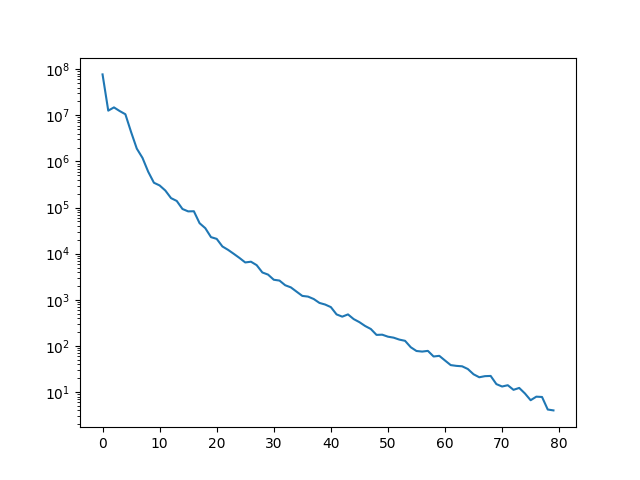

In [6]:
plot.semilogy(np.diag(gcov.get_ell_cov(4,2).cov))